In [289]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss

from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Prep. DATA

#### 1. Load Data and Observe

In [290]:
# load data
df = pd.read_csv('../../data/H2.csv')

In [291]:
df.shape

(79330, 31)

In [292]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [293]:
df.dtypes

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                       float64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

In [294]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IsCanceled,79330.0,0.417270,0.493111,0.0,0.0,0.0,1.0,1.0
LeadTime,79330.0,109.735724,110.948526,0.0,23.0,74.0,163.0,629.0
ArrivalDateYear,79330.0,2016.174285,0.699181,2015.0,2016.0,2016.0,2017.0,2017.0
ArrivalDateWeekNumber,79330.0,27.177449,13.398523,1.0,17.0,27.0,38.0,53.0
ArrivalDateDayOfMonth,79330.0,15.786625,8.728451,1.0,8.0,16.0,23.0,31.0
StaysInWeekendNights,79330.0,0.795185,0.885026,0.0,0.0,1.0,2.0,16.0
StaysInWeekNights,79330.0,2.182957,1.456416,0.0,1.0,2.0,3.0,41.0
Adults,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Children,79326.0,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0
Babies,79330.0,0.004941,0.084323,0.0,0.0,0.0,0.0,10.0


#### 2. Feature Extraction

In [295]:
# Combine "ArrivalDate"columns into a single datetime variable
df["ArrivalDate"] = pd.to_datetime(
    df[["ArrivalDateYear", "ArrivalDateMonth", "ArrivalDateDayOfMonth"]]
    .astype(str)
    .apply(" ".join, 1),
    format="%Y %B %d",
)

In [296]:
# Update "ReservationStatusDate" data type
df['ReservationStatusDate'] = df['ReservationStatusDate'].astype('datetime64[ns]')

In [297]:
# Changes data type to float
df['LeadTime'] = df['LeadTime'].astype('float')

# Creates new variable containing reservation dates by substracting LeadTime from ArrivalDate
df['ReservationDate'] = [df.loc[i,'ArrivalDate'] - timedelta(days=df.loc[i,'LeadTime']) for i in df.index]

In [298]:
# Print sample of these two variables
df[['ArrivalDate', 'ReservationDate']].head()

,ArrivalDate,ReservationDate
0,2015-07-01,2015-06-25
1,2015-07-01,2015-04-04
2,2015-07-01,2015-04-27
3,2015-07-01,2015-03-31
4,2015-07-02,2015-03-24


In [299]:
# Create new variable and assign all values to 0
df['ChangedRoom'] = 0

# Assign 1 to all values where Reserved Room Type is not the same as Assigned Room Type
df['ChangedRoom'].where(df.ReservedRoomType == df.AssignedRoomType, 1, inplace=True)

In [300]:
# Checks result
df['ChangedRoom'].value_counts()

ChangedRoom
0    72138
1     7192
Name: count, dtype: int64

In [301]:
# Create 'TotalStay'
df['TotalStay'] = (df['StaysInWeekendNights'] + df['StaysInWeekNights']).astype('float')

In [302]:
# Calculate check out date
df['CheckOutDate'] = [df.loc[i, 'ArrivalDate'] + timedelta(days=df.loc[i,'TotalStay']) for i in df.index]

In [303]:
# Calculate if guest extended or shorten his/her stay from original booking
for i in df.index:
    if (df.loc[i, "CheckOutDate"] < df.loc[i, "ReservationStatusDate"]) & (
        df.loc[i, "ReservationStatus"] == "Check-Out"
    ):
        df.loc[i, "StayChanges"] = "Extended"
    elif (df.loc[i, "CheckOutDate"] > df.loc[i, "ReservationStatusDate"]) & (
        df.loc[i, "ReservationStatus"] == "Check-Out"
    ):
        df.loc[i, "StayChanges"] = "Early Check-Out"
    else:
        df.loc[i, "StayChanges"] = "No Changes"

In [304]:
# Checks result
df['StayChanges'].value_counts()

StayChanges
No Changes         79324
Early Check-Out        6
Name: count, dtype: int64

In [305]:
# Remove blank spaces from string values in df
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

#### 3. Feature Analysis

In [306]:
# Check summary statistics for numeric variables
df.describe().T

,count,mean,min,25%,50%,75%,max,std
IsCanceled,79330.0,0.41727,0.0,0.0,0.0,1.0,1.0,0.493111
LeadTime,79330.0,109.735724,0.0,23.0,74.0,163.0,629.0,110.948526
ArrivalDateYear,79330.0,2016.174285,2015.0,2016.0,2016.0,2017.0,2017.0,0.699181
ArrivalDateWeekNumber,79330.0,27.177449,1.0,17.0,27.0,38.0,53.0,13.398523
ArrivalDateDayOfMonth,79330.0,15.786625,1.0,8.0,16.0,23.0,31.0,8.728451
StaysInWeekendNights,79330.0,0.795185,0.0,0.0,1.0,2.0,16.0,0.885026
StaysInWeekNights,79330.0,2.182957,0.0,1.0,2.0,3.0,41.0,1.456416
Adults,79330.0,1.850977,0.0,2.0,2.0,2.0,4.0,0.509292
Children,79326.0,0.09137,0.0,0.0,0.0,0.0,3.0,0.372177
Babies,79330.0,0.004941,0.0,0.0,0.0,0.0,10.0,0.084323


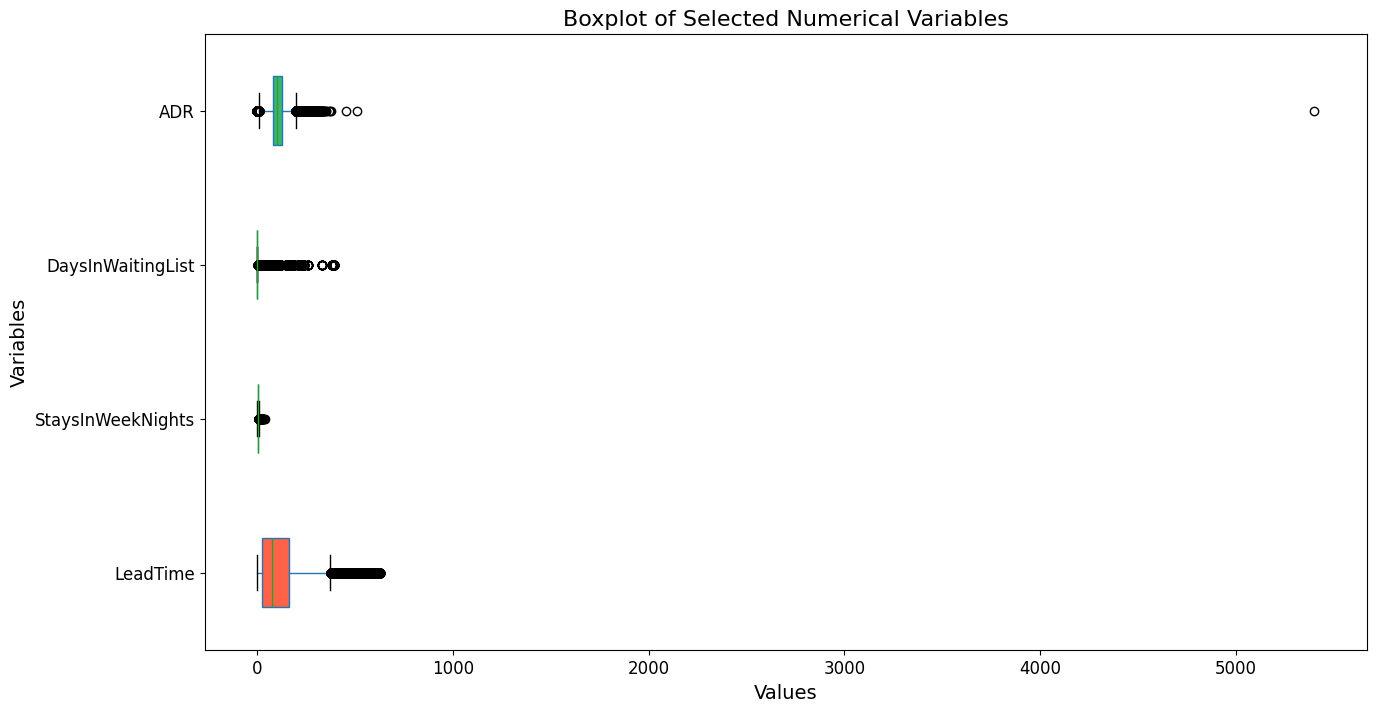

In [307]:
def plot_boxplot(df, columns, colors, title, xlabel, ylabel, fig_size=(15, 8)):
    plt.figure(figsize=fig_size)
    box = df[columns].boxplot(
        grid=False, vert=False, fontsize=12, patch_artist=True, return_type="dict"
    )
    for patch, color in zip(box["boxes"], colors):
        patch.set_facecolor(color)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.show()


plot_boxplot(
    df,
    columns=["LeadTime", "StaysInWeekNights", "DaysInWaitingList", "ADR"],
    colors=["#FF6347", "#4682B4", "#8A2BE2", "#3CB371"],
    title="Boxplot of Selected Numerical Variables",
    xlabel="Values",
    ylabel="Variables",
)

In [308]:
# Eliminate values in ADR higher than EUR 1,000
df = df[df['ADR'] < 1000]

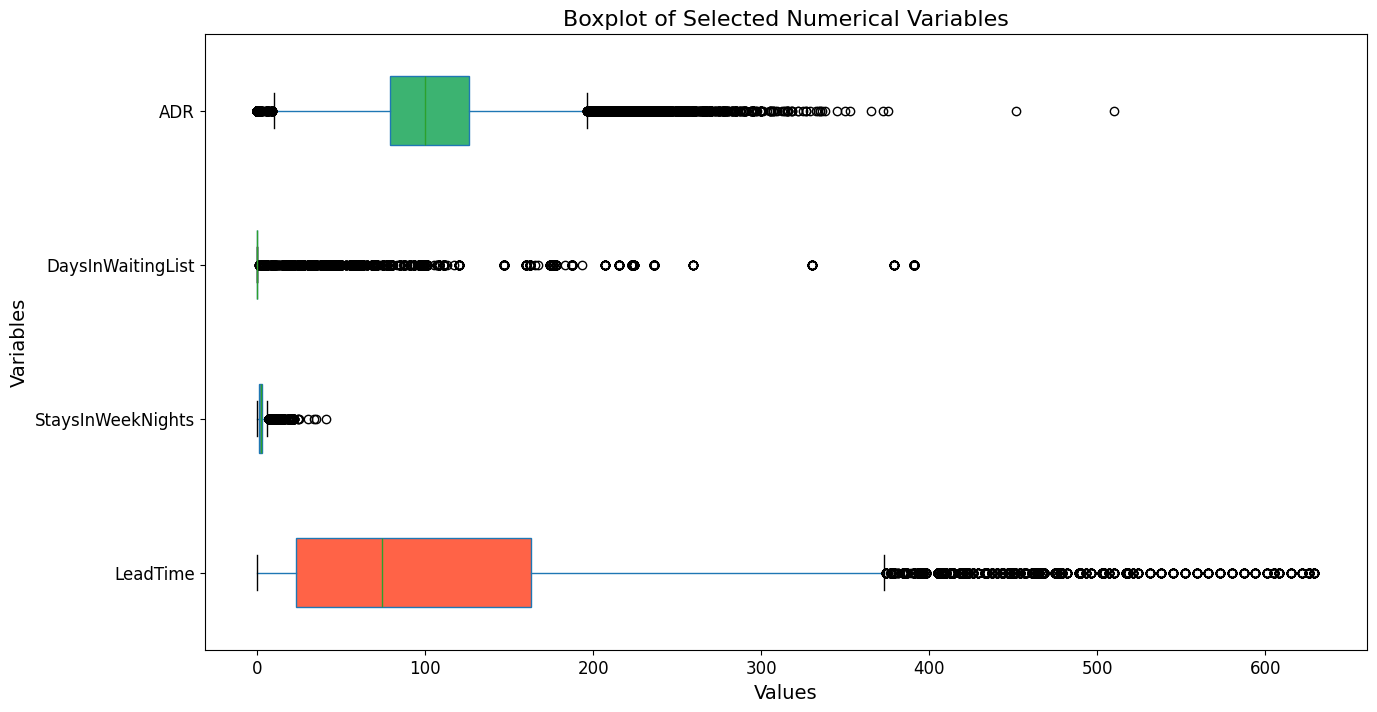

In [309]:
plot_boxplot(
    df,
    columns=["LeadTime", "StaysInWeekNights", "DaysInWaitingList", "ADR"],
    colors=["#FF6347", "#4682B4", "#8A2BE2", "#3CB371"],
    title="Boxplot of Selected Numerical Variables",
    xlabel="Values",
    ylabel="Variables",
)

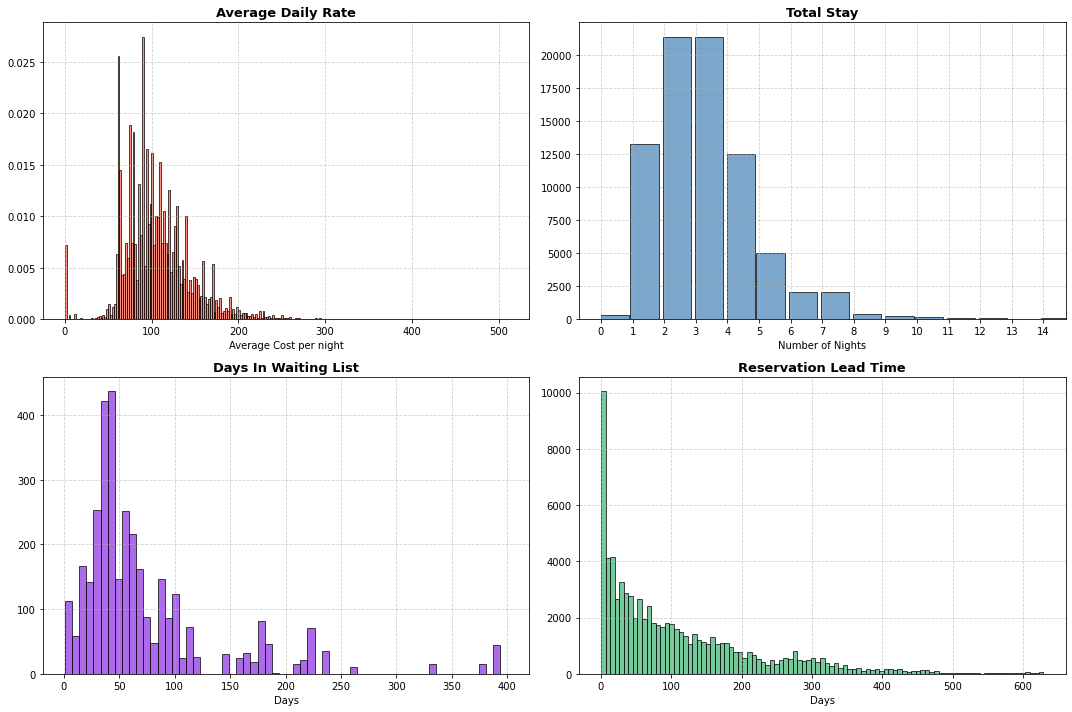

In [310]:
# Plot histograms for selected variables. We have adjusted the ranges and bin number for visualization purposes
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), dpi=72)

# ADR
ax0.hist(df["ADR"], bins="auto", density=True, color="#FF6347", edgecolor="black", alpha=0.7)
ax0.set_title("Average Daily Rate", fontsize=13, fontweight="bold")
ax0.set_xlabel("Average Cost per night")
ax0.grid(True, linestyle="--", alpha=0.6)

# Total Stay
ax1.hist(df["TotalStay"], bins="auto", range=(0, 14), width=0.9, color="#4682B4", edgecolor="black", alpha=0.7)
ax1.set_xticks(range(0, 15))
ax1.set_title("Total Stay", fontsize=13, fontweight="bold")
ax1.set_xlabel("Number of Nights")
ax1.grid(True, linestyle="--", alpha=0.6)

# Days in Waiting List
ax2.hist(df["DaysInWaitingList"], bins="auto", range=(1, 400), color="#8A2BE2", edgecolor="black", alpha=0.7)
ax2.set_title("Days In Waiting List", fontsize=13, fontweight="bold")
ax2.set_xlabel("Days")
ax2.grid(True, linestyle="--", alpha=0.6)

# Lead Time
ax3.hist(df["LeadTime"], bins="auto", color="#3CB371", edgecolor="black", alpha=0.7)
ax3.set_title("Reservation Lead Time", fontsize=13, fontweight="bold")
ax3.set_xlabel("Days")
ax3.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

In [311]:

def plot_demographics(df, nrows, ncols, columns, titles):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10), dpi=72)    
    
    for ax, col, title in zip(axes.flatten(), columns, titles):
        ax.bar(df[col].value_counts().sort_index().index, 
               df[col].value_counts().sort_index() * 100 / len(df), 
               color="skyblue", edgecolor="black", alpha=0.7)
        ax.set_title(title, fontsize=15, fontweight="bold")
        ax.set_xlabel(title, fontsize=13)
        ax.set_ylabel("Frequency (%)", fontsize=13)
        ax.grid(axis="y", linestyle="--", alpha=0.7)
    
    plt.tight_layout()
    plt.show()

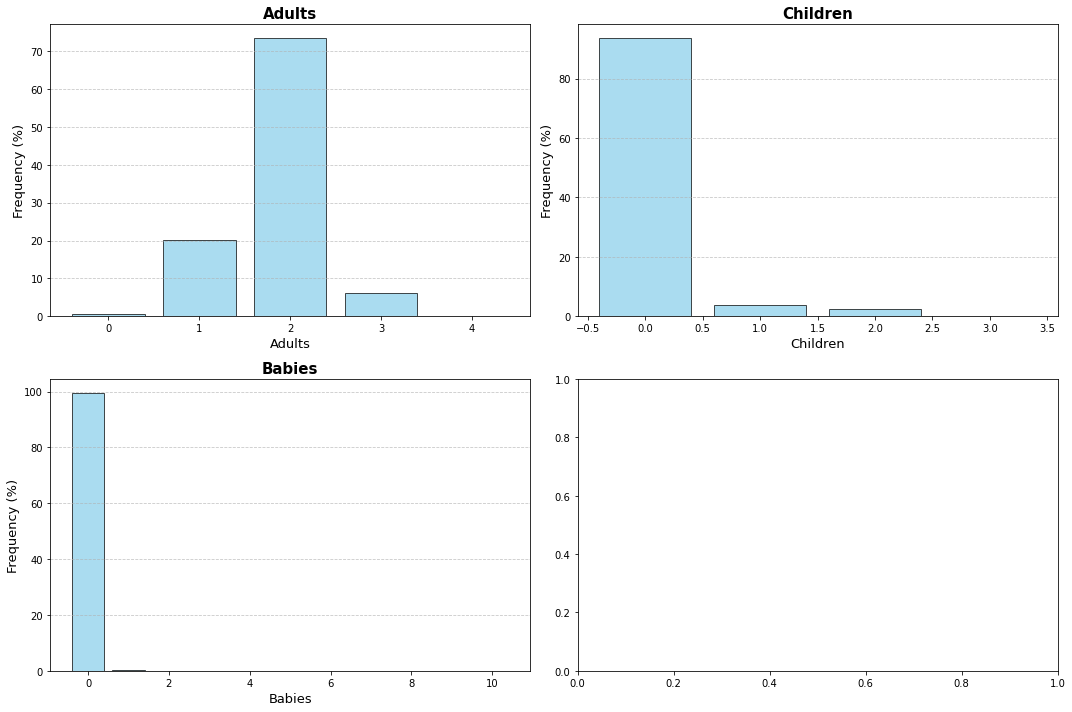

In [312]:
plot_demographics(df, nrows=2, ncols=2,
                  columns=["Adults", "Children", "Babies"],
                  titles=["Adults", "Children", "Babies"])

In [313]:
# Print reservations with 0 'adults' 
df[df['Adults'] == 0].head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate,ReservationDate,ChangedRoom,TotalStay,CheckOutDate,StayChanges
332,0,132.0,2015,July,30,23,2,5,0,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,4,No Deposit,1,NULL,0,Transient-Party,0.0,0,0,Check-Out,2015-07-30,2015-07-23,2015-03-13,0,7.0,2015-07-30,No Changes
862,0,0.0,2015,August,33,9,2,0,0,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,F,B,0,No Deposit,9,NULL,0,Contract,0.0,0,0,Check-Out,2015-08-11,2015-08-09,2015-08-09,1,2.0,2015-08-11,No Changes
924,0,1.0,2015,August,33,10,1,1,0,3.0,0,BB,PRT,Direct,Direct,0,0,0,B,B,1,No Deposit,NULL,NULL,0,Transient-Party,9.0,0,0,Check-Out,2015-08-12,2015-08-10,2015-08-09,0,2.0,2015-08-12,No Changes
960,0,0.0,2015,August,33,10,9,20,0,0.0,0,SC,PRT,Online TA,Direct,0,0,0,E,K,20,No Deposit,NULL,47,0,Transient,0.0,0,0,Check-Out,2015-09-08,2015-08-10,2015-08-10,1,29.0,2015-09-08,No Changes
988,0,104.0,2015,August,33,11,0,3,0,2.0,0,BB,FRA,Online TA,TA/TO,0,0,0,B,B,1,No Deposit,7,NULL,0,Transient-Party,6.0,0,2,Check-Out,2015-08-14,2015-08-11,2015-04-29,0,3.0,2015-08-14,No Changes


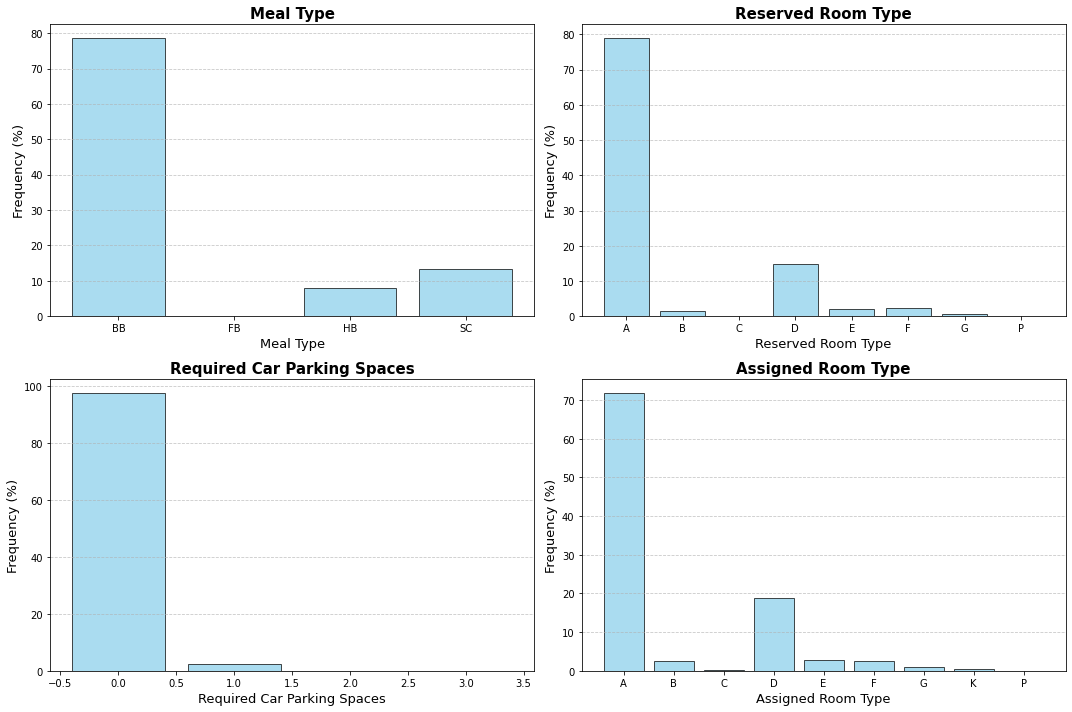

In [314]:
plot_demographics(df, nrows=2, ncols=2,
                  columns=["Meal", "ReservedRoomType", "RequiredCarParkingSpaces", "AssignedRoomType"], 
                  titles=["Meal Type", "Reserved Room Type", "Required Car Parking Spaces", "Assigned Room Type"])

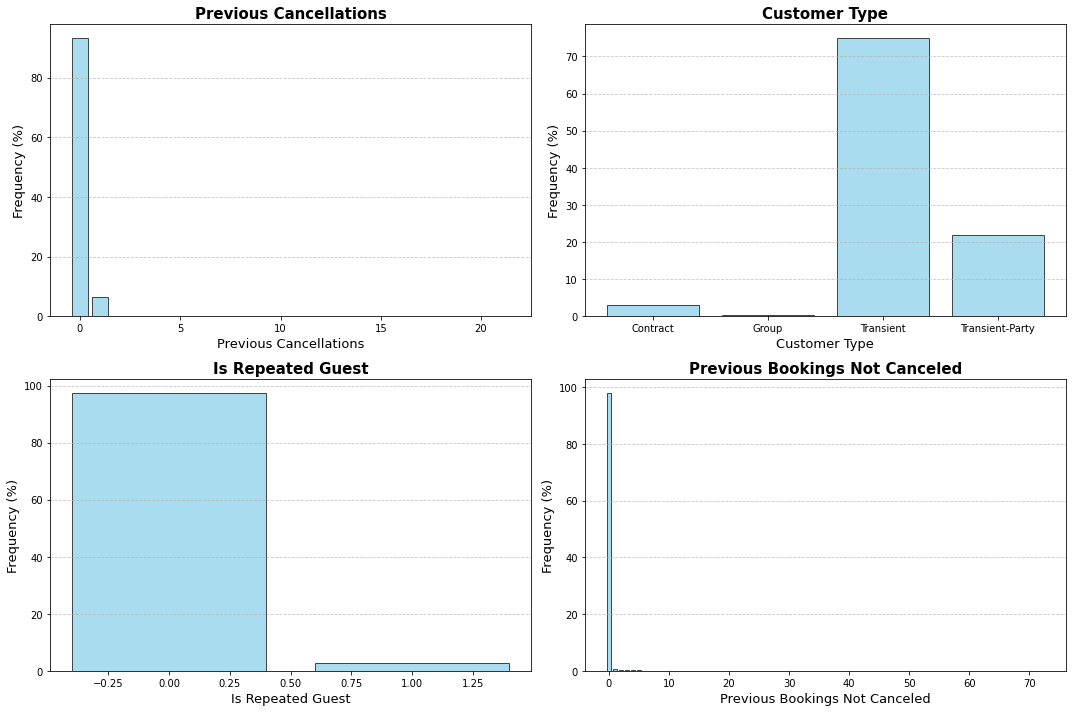

In [315]:
plot_demographics(df, nrows=2, ncols=2,
                  columns=["PreviousCancellations", "CustomerType", "IsRepeatedGuest", "PreviousBookingsNotCanceled"], 
                  titles=["Previous Cancellations", "Customer Type", "Is Repeated Guest", "Previous Bookings Not Canceled"])

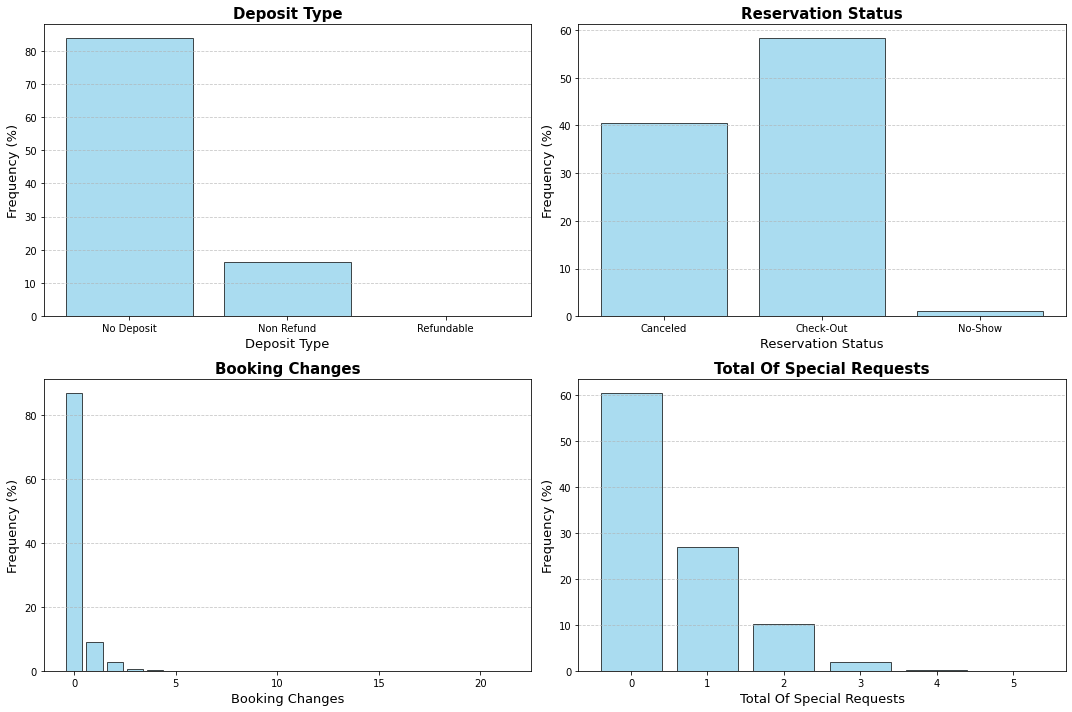

In [316]:
plot_demographics(df, nrows=2, ncols=2,
                  columns=["DepositType", "ReservationStatus", "BookingChanges", "TotalOfSpecialRequests"], 
                  titles=["Deposit Type", "Reservation Status", "Booking Changes", "Total Of Special Requests"])

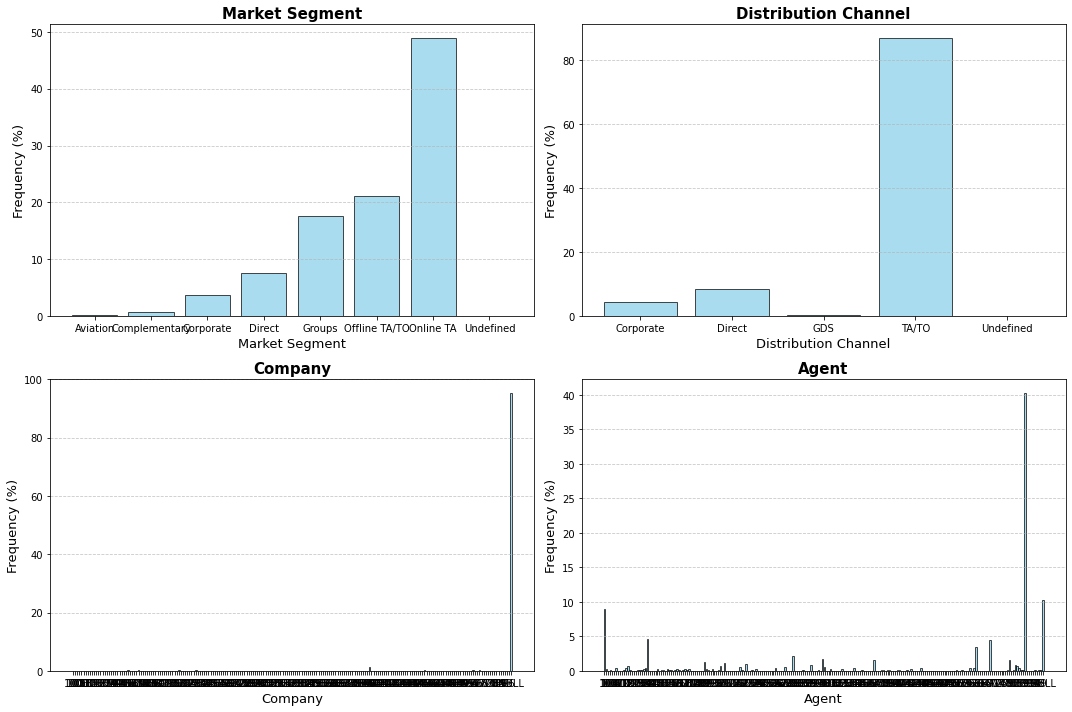

In [317]:
plot_demographics(df, nrows=2, ncols=2,
                  columns=["MarketSegment", "DistributionChannel", "Company", "Agent"], 
                  titles=["Market Segment", "Distribution Channel", "Company", "Agent"])

In [318]:
# Shows the number of countries origin of guests
print(f"There are {str(df['Country'].nunique())} different countries of origin in the dataset")

There are 166 different countries of origin in the dataset


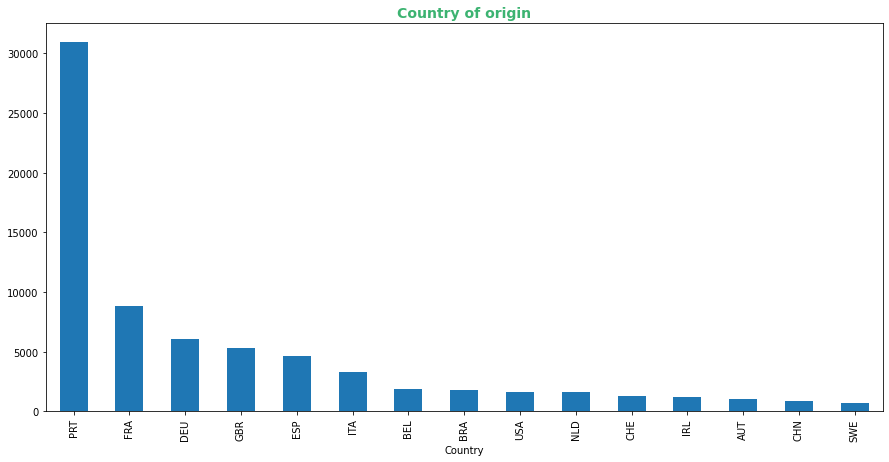

In [319]:
# Creates figure for plots
fig = plt.figure(figsize=(15,7), dpi=72)

# Plots the first more common country of origin of customers
df['Country'].value_counts()[:15].plot(kind='bar')
plt.title('Country of origin', fontsize=14, fontweight='bold', color='#3CB371')
plt.show()

In [320]:
# Creates filter to remove codes with no country associated
cond = (df["Country"] != "TMP") & (df["Country"] != "ATA") & (df["Country"] != "CN")

# Removes observations with misspelled country codes
df = df[cond]

In [321]:
# Creates a Series containing total number of arrivals per month of the year
df_arrivals = df["ArrivalDateMonth"].groupby(df["ArrivalDateMonth"]).count()
df_arrivals.index = pd.to_datetime(df_arrivals.index, format="%B")
df_arrivals.sort_index(inplace=True)
df_arrivals.index = df_arrivals.index.strftime("%b")

In [322]:
# Creates a Series containing total number of bookings per month of the year
df["ReservationMonth"] = [i.month for i in df["ReservationDate"]]

df_bookings = df["ReservationMonth"].groupby(df["ReservationMonth"]).count()
df_bookings.index = pd.to_datetime(df_bookings.index, format="%m")
df_bookings.sort_index(inplace=True)
df_bookings.index = df_bookings.index.strftime("%b")

In [323]:
# Converts month number to string
to_name = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 
           7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
df['ReservationMonth'] = df['ReservationMonth'].map(to_name)

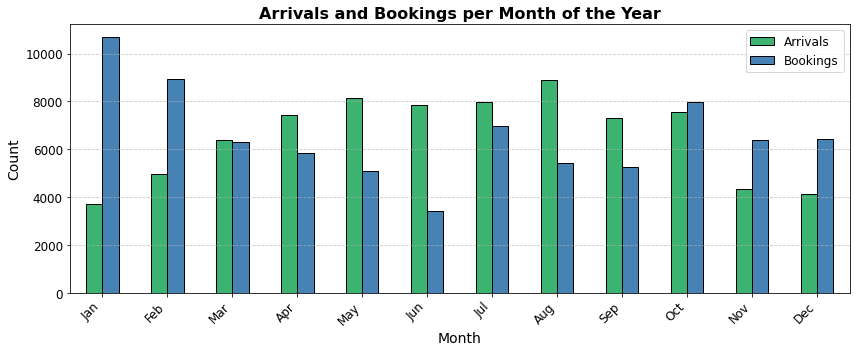

In [324]:
# Create a new DataFrame for plotting
df_plot = pd.concat([df_arrivals, df_bookings], axis=1)
df_plot.columns = ['Arrivals', 'Bookings']

fig, ax = plt.subplots(figsize=(12, 5), dpi=72)
df_plot.plot(kind='bar', ax=ax, color=['#3CB371', '#4682B4'], edgecolor='black')

ax.set_title('Arrivals and Bookings per Month of the Year', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticklabels(df_plot.index, rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(['Arrivals', 'Bookings'], fontsize=12)

plt.tight_layout()
plt.show()

#### 4. Quality assessment and data cleaning

In [325]:
# Replace Undefined data points in MarketSegment
df['MarketSegment'].replace('Undefined', np.nan, inplace=True)

# Replace Undefined data points in DistributionChannel
df['DistributionChannel'].replace('Undefined', np.nan, inplace=True)

# Remove trailing spaces from values in DepositType
df['DepositType'] = df['DepositType'].map(lambda x: x.strip())
# Replace Undefined data points in DistributionChannel
df['DepositType'].replace('Refundable', np.nan, inplace=True)

In [326]:
# Select reservations with values of Adults, Children and Babies equal to 0.
cond = (df.Adults == 0) & (df.Children == 0) & (df.Babies == 0)

# Replace those values for NaN
df["Adults"].mask(cond, inplace=True)

In [327]:
# Replace 9 and 10 values in Babies
df["Babies"].replace([9, 10], np.nan, inplace=True)

In [328]:
# Checks for NaN values in df
df.isna().sum()

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                         167
Children                         4
Babies                           2
Meal                             0
Country                         24
MarketSegment                    2
DistributionChannel              4
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                     19
Agent                            0
Company                          0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces         0
TotalOfSpecialReques

In [329]:
# Calculates percentage of NaN values in ADR
per = df.Adults.isna().sum()*100 / df.Adults.shape[0]
print('The proportion of nan values in ADR feature is '+str(round(per, 3))+'%')

The proportion of nan values in ADR feature is 0.212%


In [330]:
# Removes rows with NaN values
df.dropna(axis=0, inplace=True)

In [331]:
# Writing df dataframe to csv
df.to_csv('../../data/H2_cleaned.csv', index=False)

#### 5. Reducing the variable cardinality

In [332]:
# Checks number of unique values in each column
df.nunique().sort_values(ascending=False)

ADR                            5367
ReservationDate                 888
ReservationStatusDate           864
CheckOutDate                    800
ArrivalDate                     793
LeadTime                        453
Agent                           224
Company                         204
Country                         163
DaysInWaitingList               114
PreviousBookingsNotCanceled      73
ArrivalDateWeekNumber            53
TotalStay                        34
ArrivalDateDayOfMonth            31
StaysInWeekNights                26
BookingChanges                   18
ArrivalDateMonth                 12
StaysInWeekendNights             12
ReservationMonth                 12
PreviousCancellations            10
AssignedRoomType                  8
MarketSegment                     7
ReservedRoomType                  7
TotalOfSpecialRequests            6
Adults                            5
CustomerType                      4
RequiredCarParkingSpaces          4
Children                    

In [333]:
# Load ISO country codes
countries_df = pd.read_csv("../../data/ISO_country_code.csv", index_col='alpha-3')

In [334]:
# Changes values in for most common origin countries
countries_df.loc['PRT'] = 'National'
countries_df.loc['FRA'] = 'France'
countries_df.loc['DEU'] = 'Germany'
countries_df.loc['GBR'] = 'United_Kingdom'
countries_df.loc['ESP'] = 'Spain'

# Converts country codes in a dict
countries_dict = countries_df.to_dict()['region']

# Regroup Country attribute in fewer categories
df['Country'].replace(countries_dict, inplace=True)

In [335]:
# Checks for resulting changes
df['Country'].value_counts()

Country
National          30851
Other_Europe      14848
France             8790
Germany            6080
United_Kingdom     5306
Spain              4600
Other_Americas     3926
Other_Asia         2802
Other_Africa        940
Other_Oceania       404
Name: count, dtype: int64

In [336]:
# Regroups PreviousCancellations column in fewer categories
df['PreviousCancellations'] = pd.cut(df['PreviousCancellations'], bins=[-np.inf,0,1,np.inf], labels=['0', '1','2+'])

# Regroups PreviousBookingsNotCanceled column in fewer categories
df['PreviousBookingsNotCanceled'] = pd.cut(df['PreviousBookingsNotCanceled'], bins=[-np.inf,0,1,np.inf], labels=['0','1-2','3+'])

# Regroup Babies column into binary
df['RequiredCarParkingSpaces'].where(df.RequiredCarParkingSpaces==0, 1, inplace=True)

# Regroup Babies column into binary
df['Babies'].where(df.Babies==0, 1, inplace=True)

# Regroup Children column into binary
df['Children'].where(df.Children==0, 1, inplace=True)

# Regroup Agent column into less categories
# First step: Replace nan values with value 0
df['Agent'].fillna(0.0, inplace=True)
df['Agent'].replace('NULL', 0, inplace=True)
# Replace most common agents with code for better readability
conv = {0.0:'no_Agent', 9.0:'Agent_A', 1.0:'Agent_B', 14.0:'Agent_C', 7.0:'Agent_D', 6.0:'Agent_E'}
df['Agent'].replace(conv, inplace=True)
# Finally, group the rest of values in single category
df['Agent'] = df['Agent'].map(lambda x: str(x))
df['Agent'].where(df.Agent.str.contains('Agent'), 'other_Agent', inplace=True)

# Regroup Company column into less categories
# First step: Replace nan values with value 0
df['Company'].fillna(0.0, inplace=True)
df['Company'].replace('NULL', 0, inplace=True)
# Replace most common companies with code for better readability
conv = {0.0:'no_Company', 40.0:'Company_A'}
df['Company'].replace(conv, inplace=True)
# Finally, group the rest of values in single category
df['Company'] = df['Company'].map(lambda x: str(x))
df['Company'].where(df.Company.str.contains('Company'), 'other_Company', inplace=True)

# Reduces number of categories in ReservedRoomType column
df['ReservedRoomType'] = df['ReservedRoomType'].map(lambda x: x.strip())
df['ReservedRoomType'].where((df.ReservedRoomType=='A') | (df.ReservedRoomType=='D'), 'Other', inplace=True)

# Reduces number of categories in TotalOfSpecialRequests column
df['TotalOfSpecialRequests'] = pd.cut(df['TotalOfSpecialRequests'], bins=[-np.inf,0,1,np.inf], labels=['0', '1','2+'])

# Reduces number of categories in TotalOfSpecialRequests column
df['BookingChanges'] = pd.cut(df['BookingChanges'], bins=[-np.inf,0,1,np.inf], labels=['0', '1','2+'])

# Reduces number of categories in TotalOfSpecialRequests column
df['StaysInWeekendNights'] = pd.cut(df['StaysInWeekendNights'], bins=[-np.inf,0,1,2,np.inf], labels=['0','1','2','3+'])

# Reduces number of categories in TotalOfSpecialRequests column
df['StaysInWeekNights'] = pd.cut(df['StaysInWeekNights'], bins=[-np.inf,0,1,2,3,4,5,np.inf], labels=['0','1','2','3','4','5','6+'])

In [337]:
df['Agent'].value_counts(), df['Company'].value_counts()

(Agent
 other_Agent    70486
 no_Agent        8061
 Name: count, dtype: int64,
 Company
 no_Company       74887
 other_Company     3660
 Name: count, dtype: int64)

In [338]:
# Converts all non float variables in categorical
df['DaysInWaitingList'] = df['DaysInWaitingList'].astype('float64')
cat_cols = df.select_dtypes(exclude='float64').columns
df[cat_cols] = df[cat_cols].astype('category')

# Convert variables to categorical
df['Adults'] = df['Adults'].astype('category')
df['Children'] = df['Children'].astype('category')
df['Babies'] = df['Babies'].astype('category')
df['Country'] = df['Country'].astype('category')

In [339]:
df.shape

(78547, 38)

In [340]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate,ReservationDate,ChangedRoom,TotalStay,CheckOutDate,StayChanges,ReservationMonth
0,0,6.0,2015,July,27,1,0,2,1.0,0.0,0.0,HB,National,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,other_Agent,no_Company,0.0,Transient,0.0,0,0,Check-Out,2015-07-03,2015-07-01,2015-06-25,0,2.0,2015-07-03,No Changes,June
1,1,88.0,2015,July,27,1,0,4,2.0,0.0,0.0,BB,National,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,other_Agent,no_Company,0.0,Transient,76.5,0,1,Canceled,2015-07-01,2015-07-01,2015-04-04,0,4.0,2015-07-05,No Changes,April
2,1,65.0,2015,July,27,1,0,4,1.0,0.0,0.0,BB,National,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,other_Agent,no_Company,0.0,Transient,68.0,0,1,Canceled,2015-04-30,2015-07-01,2015-04-27,0,4.0,2015-07-05,No Changes,April
3,1,92.0,2015,July,27,1,2,4,2.0,0.0,0.0,BB,National,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,other_Agent,no_Company,0.0,Transient,76.5,0,2+,Canceled,2015-06-23,2015-07-01,2015-03-31,0,6.0,2015-07-07,No Changes,March
4,1,100.0,2015,July,27,2,0,2,2.0,0.0,0.0,BB,National,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,other_Agent,no_Company,0.0,Transient,76.5,0,1,Canceled,2015-04-02,2015-07-02,2015-03-24,0,2.0,2015-07-04,No Changes,March


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78547 entries, 0 to 79329
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   IsCanceled                   78547 non-null  category
 1   LeadTime                     78547 non-null  float64 
 2   ArrivalDateYear              78547 non-null  category
 3   ArrivalDateMonth             78547 non-null  category
 4   ArrivalDateWeekNumber        78547 non-null  category
 5   ArrivalDateDayOfMonth        78547 non-null  category
 6   StaysInWeekendNights         78547 non-null  category
 7   StaysInWeekNights            78547 non-null  category
 8   Adults                       78547 non-null  category
 9   Children                     78547 non-null  category
 10  Babies                       78547 non-null  category
 11  Meal                         78547 non-null  category
 12  Country                      78547 non-null  category
 13  Market

In [342]:
# List non relevant variables for the analysis
to_drop = ['ReservationDate', 'ReservationStatusDate', 'CheckOutDate', 
           'ArrivalDate', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 
           'ArrivalDateYear', 'AssignedRoomType']

# Removes features and creates new df for Cramer's V correlation analysis
df_copy = df.drop(to_drop, axis=1)

In [343]:
# Converts numerical variables into categorical by binning the values in quantiles
df_copy['LeadTime'] = pd.qcut(df['LeadTime'], 10)
df_copy['ADR'] = pd.qcut(df['ADR'], 10)
df_copy['TotalStay'] = pd.cut(df['TotalStay'], bins=[0,1,2,3,4,5,6,7,8,np.inf], labels=['0','1','2','3','4','5','6','7','8+'])

# Converts into binary variable
df_copy['DaysInWaitingList'].where(df_copy.DaysInWaitingList==0, 1, inplace=True)
df_copy['DaysInWaitingList'] = df_copy['DaysInWaitingList'].astype('category')

#### 6. Exploration of associations among categorical variables

In [344]:
def cramers_v(x, y):
    """calculate Cramers V statistic for categorial-categorial association"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)

    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [345]:
def cramers_matrix(data):
    """Calculates Cramers V statistic matrix for a df. All variables must be categorical"""
    cols = data.columns
    idx = data.columns
    mat = pd.DataFrame()
    for i in cols:
        for j in idx:
            mat.loc[i, j] = cramers_v(data[i], data[j])
    return mat

In [346]:
# Creates the correlation matrix using Cramer's V on the copy of the dataset
corr_matrix = cramers_matrix(df_copy)

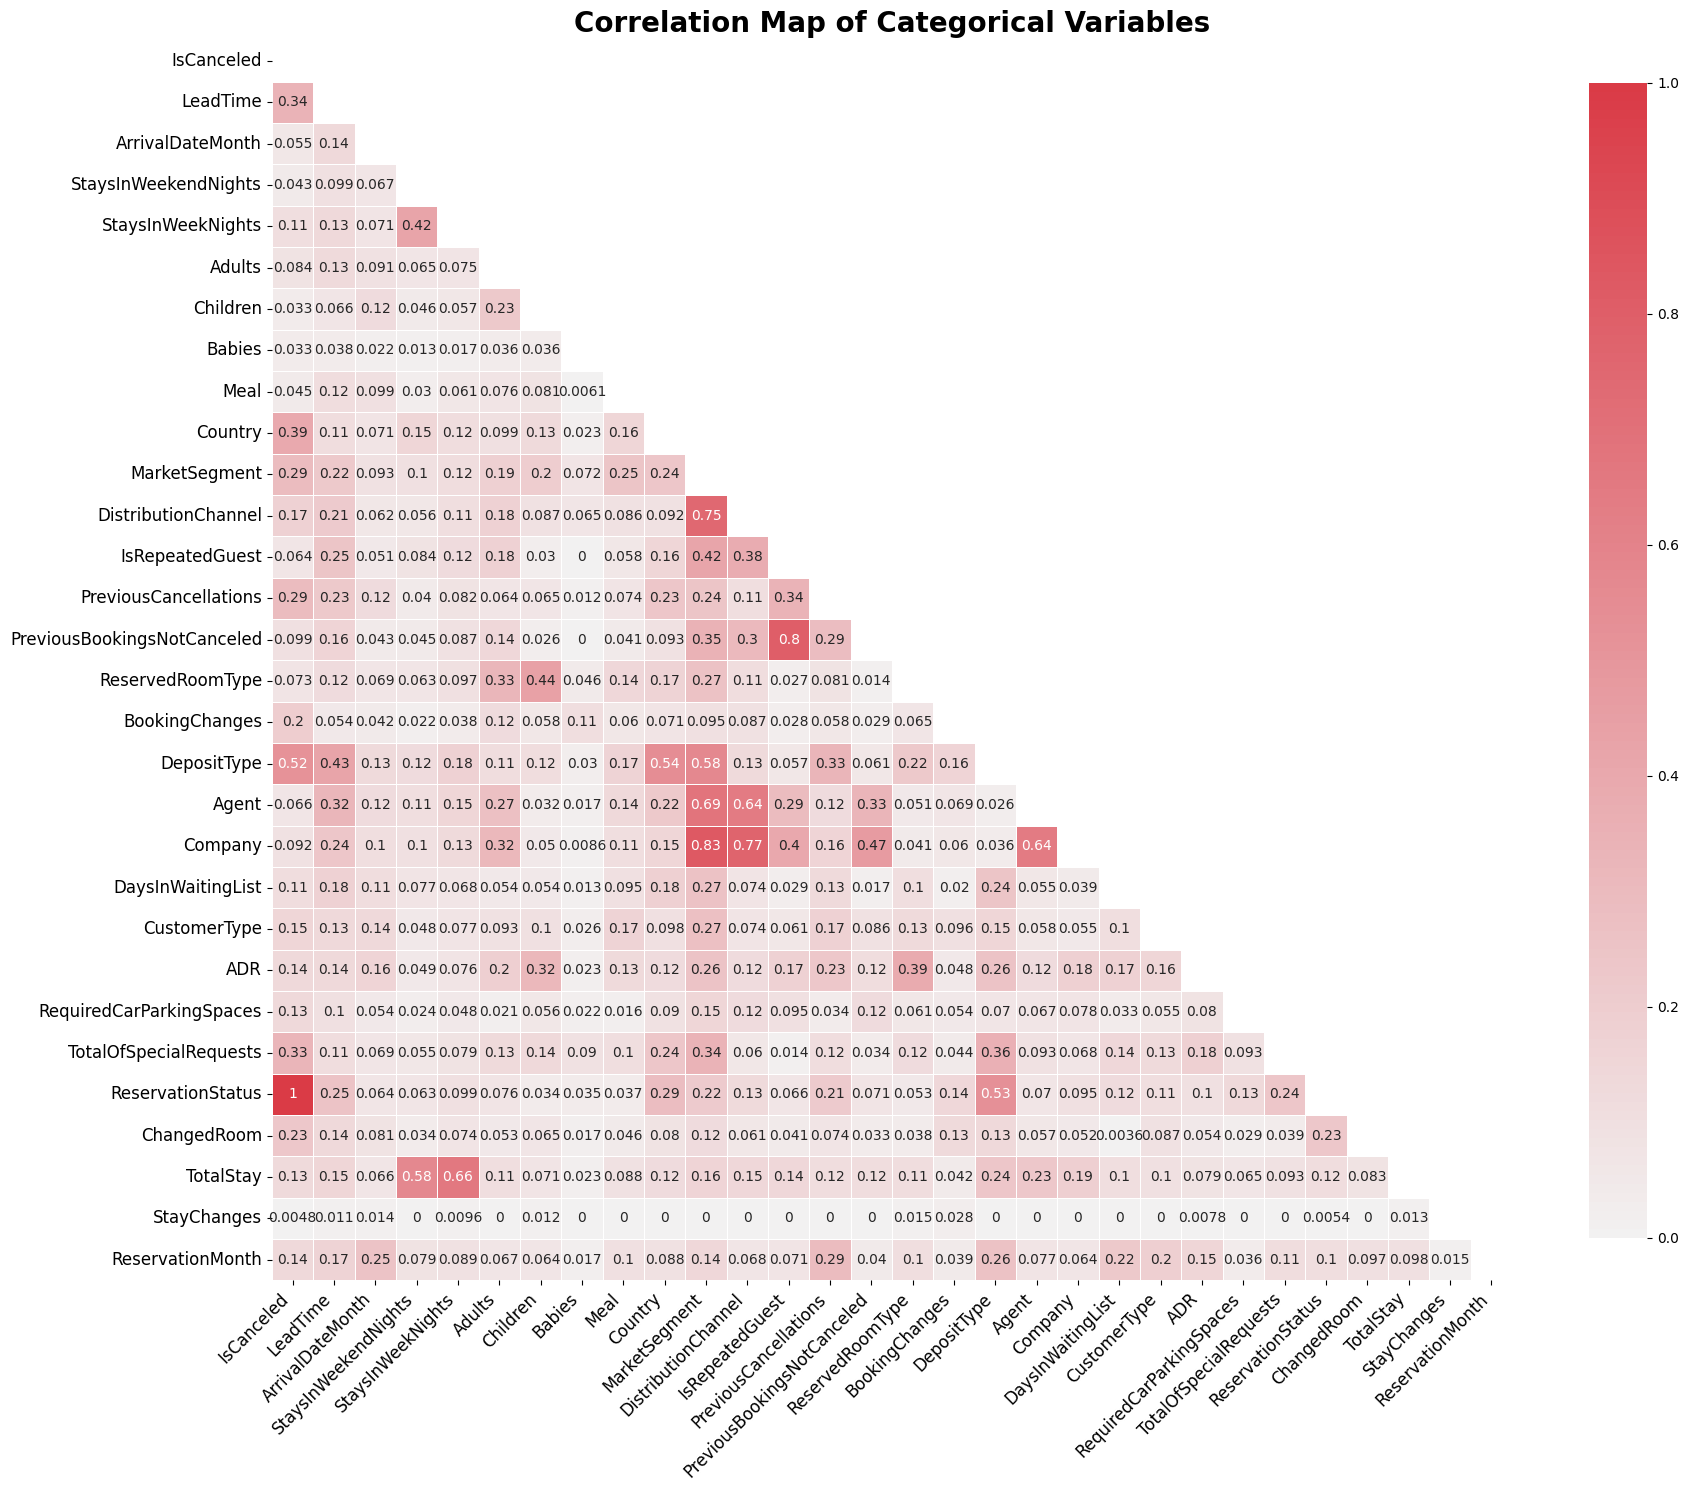

In [347]:
# Mask the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .75}, ax=ax)

ax.set_title('Correlation Map of Categorical Variables', fontsize=20, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

plt.show()

In [348]:
# Remove IsCancelled column
df.drop('IsCanceled', axis=1, inplace=True)

#### 7. Pairwise exploration of correlation in selected variables

##### Reservation channel vs. daily rates

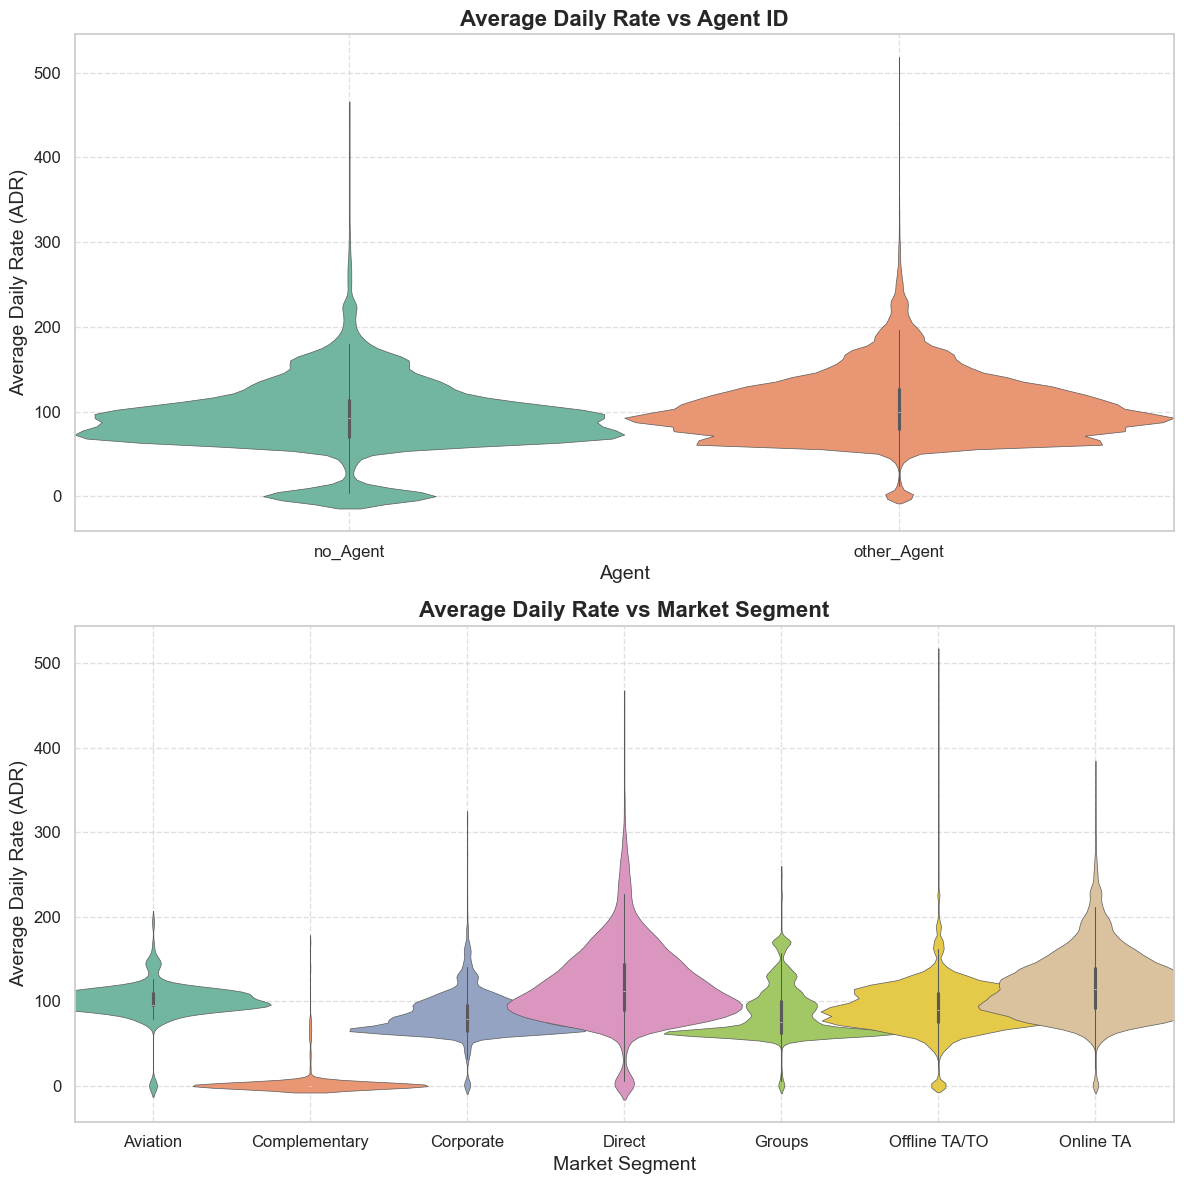

In [357]:
# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# Creates figure and two axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Creates plot on ax1
sns.violinplot(x=df['Agent'], y=df['ADR'], linewidth=0.5, width=1, ax=ax1, palette=palette)
ax1.set_title('Average Daily Rate vs Agent ID', weight='bold', fontsize=16)
ax1.set_xlabel('Agent', fontsize=14)
ax1.set_ylabel('Average Daily Rate (ADR)', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

# Creates plot on ax2
sns.violinplot(x=df['MarketSegment'], y=df['ADR'], linewidth=0.5, width=1.5, ax=ax2, palette=palette)
ax2.set_title('Average Daily Rate vs Market Segment', weight='bold', fontsize=16)
ax2.set_xlabel('Market Segment', fontsize=14)
ax2.set_ylabel('Average Daily Rate (ADR)', fontsize=14)
ax2.tick_params(labelsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.show()

##### Reservation lead time vs. reservation status

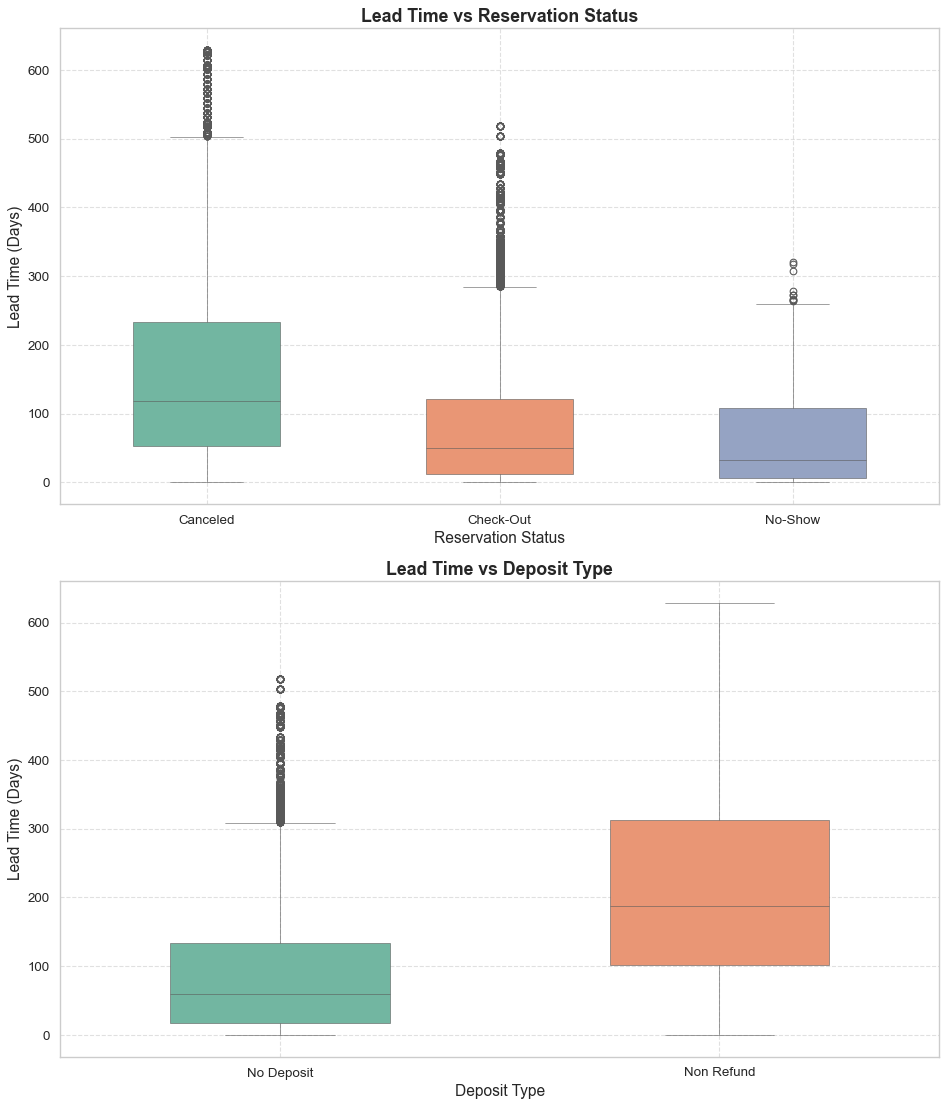

In [359]:
# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# Creates figure and two axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14), dpi=80)

# Creates plot on ax1
sns.boxplot(x=df['ReservationStatus'], y=df['LeadTime'], linewidth=0.5, width=0.5, ax=ax1, palette=palette)
ax1.set_title('Lead Time vs Reservation Status', weight='bold', fontsize=16)
ax1.set_xlabel('Reservation Status', fontsize=14)
ax1.set_ylabel('Lead Time (Days)', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

# Creates plot on ax2
sns.boxplot(x=df['DepositType'], y=df['LeadTime'], linewidth=0.5, width=0.5, ax=ax2, palette=palette)
ax2.set_title('Lead Time vs Deposit Type', weight='bold', fontsize=16)
ax2.set_xlabel('Deposit Type', fontsize=14)
ax2.set_ylabel('Lead Time (Days)', fontsize=14)
ax2.tick_params(labelsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.show()

##### Total stay vs. reservation deposit

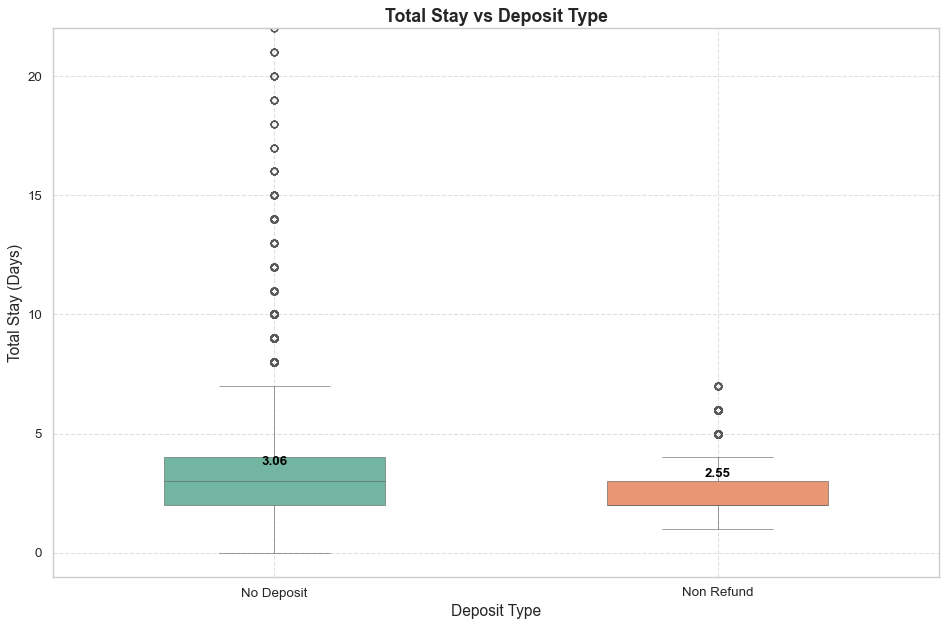

In [361]:
# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# Creates figure and two axes
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

# Creates plot on ax
sns.boxplot(x=df['DepositType'], y=df['TotalStay'], linewidth=0.5, width=0.5, ax=ax, palette=palette)
ax.set_title('Total Stay vs Deposit Type', weight='bold', fontsize=16)
ax.set_xlabel('Deposit Type', fontsize=14)
ax.set_ylabel('Total Stay (Days)', fontsize=14)
ax.set_ylim(-1, 22)
ax.tick_params(labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)

# Add mean markers
means = df.groupby('DepositType')['TotalStay'].mean()
for i, mean in enumerate(means):
    ax.text(i, mean + 0.5, f'{mean:.2f}', ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [363]:
df.head()

,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate,ReservationDate,ChangedRoom,TotalStay,CheckOutDate,StayChanges,ReservationMonth
0,6.0,2015,July,27,1,0,2,1.0,0.0,0.0,HB,National,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,other_Agent,no_Company,0.0,Transient,0.0,0,0,Check-Out,2015-07-03,2015-07-01,2015-06-25,0,2.0,2015-07-03,No Changes,June
1,88.0,2015,July,27,1,0,4,2.0,0.0,0.0,BB,National,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,other_Agent,no_Company,0.0,Transient,76.5,0,1,Canceled,2015-07-01,2015-07-01,2015-04-04,0,4.0,2015-07-05,No Changes,April
2,65.0,2015,July,27,1,0,4,1.0,0.0,0.0,BB,National,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,other_Agent,no_Company,0.0,Transient,68.0,0,1,Canceled,2015-04-30,2015-07-01,2015-04-27,0,4.0,2015-07-05,No Changes,April
3,92.0,2015,July,27,1,2,4,2.0,0.0,0.0,BB,National,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,other_Agent,no_Company,0.0,Transient,76.5,0,2+,Canceled,2015-06-23,2015-07-01,2015-03-31,0,6.0,2015-07-07,No Changes,March
4,100.0,2015,July,27,2,0,2,2.0,0.0,0.0,BB,National,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,other_Agent,no_Company,0.0,Transient,76.5,0,1,Canceled,2015-04-02,2015-07-02,2015-03-24,0,2.0,2015-07-04,No Changes,March


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78547 entries, 0 to 79329
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   LeadTime                     78547 non-null  float64 
 1   ArrivalDateYear              78547 non-null  category
 2   ArrivalDateMonth             78547 non-null  category
 3   ArrivalDateWeekNumber        78547 non-null  category
 4   ArrivalDateDayOfMonth        78547 non-null  category
 5   StaysInWeekendNights         78547 non-null  category
 6   StaysInWeekNights            78547 non-null  category
 7   Adults                       78547 non-null  category
 8   Children                     78547 non-null  category
 9   Babies                       78547 non-null  category
 10  Meal                         78547 non-null  category
 11  Country                      78547 non-null  category
 12  MarketSegment                78547 non-null  category
 13  Distri